# EDA Case study Notebook 

### Let us import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(color_codes=True)

### Import the Dataset Application data

In [2]:
inp1 = pd.read_csv("application_data.csv")

In [4]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### check the missing value present in dataset

In [6]:
missing_Values = inp1.count()/len(inp1)
missing_Values

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 122, dtype: float64

#### Percent Missing values present in columns sorted in decending form 

In [12]:
missing_percent = (1-missing_Values)*100
missing_percent.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### as you can see in above section most of missing values are in mean,median,mode table
#### we will create a seprate variable for actual data "tree" and use it for some analysis 

In [10]:
tree = inp1.loc[:, missing_percent<50]
tree

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning and Missing values Treatment

as you can see some of the columns have many missing values , and such values may cause an error in further data analysis.
soo we need terminate or replace such missing values depends on column types  
columns for which has missing values are around or more than 50% are mostly either mean, median or mode.
So, there is no way one can replace these missing data.
we will use other columns for analysis , lets check them

#### The Columns are
- OCCUPATION_TYPE                 = 31.345545
- EXT_SOURCE_3                    = 19.825307
- AMT_REQ_CREDIT_BUREAU_HOUR      = 13.501631
- AMT_REQ_CREDIT_BUREAU_DAY       = 13.501631
- AMT_REQ_CREDIT_BUREAU_WEEK      = 13.501631
- AMT_REQ_CREDIT_BUREAU_MON       = 13.501631
- AMT_REQ_CREDIT_BUREAU_QRT       = 13.501631
- AMT_REQ_CREDIT_BUREAU_YEAR      = 13.501631

#### Lets analyze Occupation type column

#### Occupation column has 30% missing values ,as it is a huge percent deleting them wont make any sense,Lets analysis this column


In [16]:
tree["OCCUPATION_TYPE"].value_counts()


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

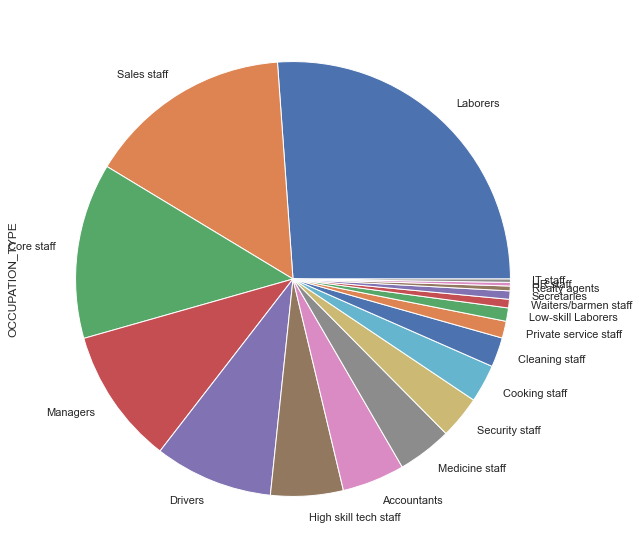

In [65]:
tree["OCCUPATION_TYPE"].value_counts().plot.pie(figsize=(20,10))
plt.show()

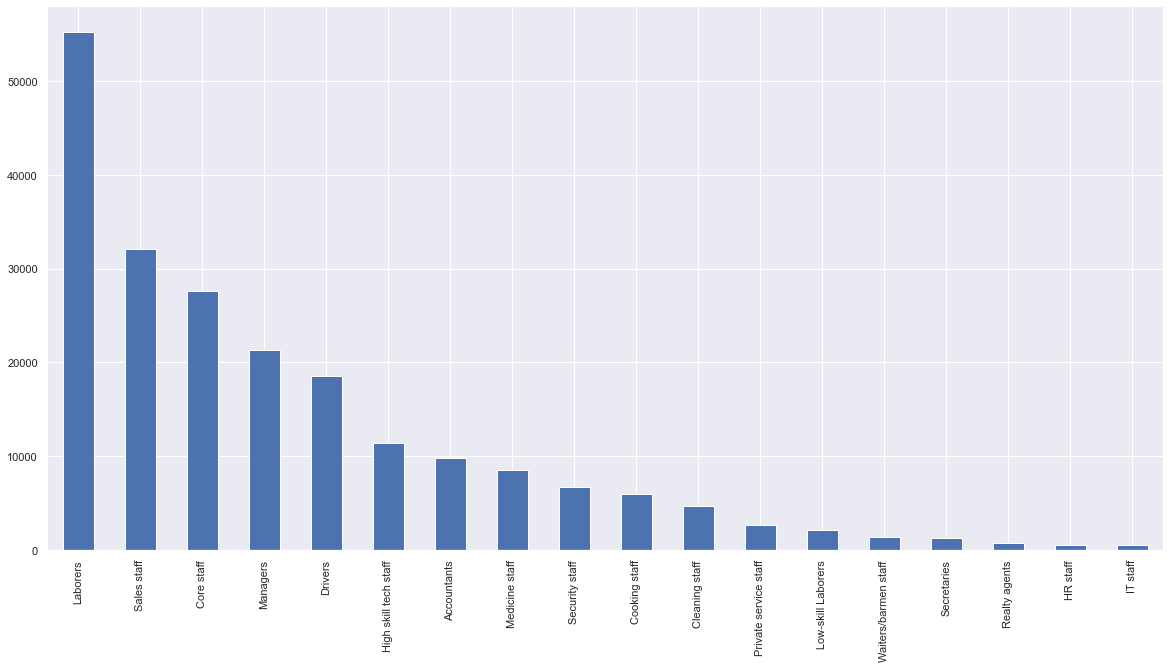

In [64]:
#inp1["OCCUPATION_TYPE"].value_counts().plot.bar()
tree["OCCUPATION_TYPE"].value_counts().plot.bar(figsize=(20,10))
plt.show()

as you can see from the bar chart most major occuring and repeated values are laborers and this column has 30% missing values but replacing missing values with laborers wont be any fair, soo we dont make any changes

#### Lets do analysis on EXT_SOURCE_3 column

In [32]:
inp1["EXT_SOURCE_3"].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [33]:
inp1["EXT_SOURCE_3"].isnull().sum()

60965

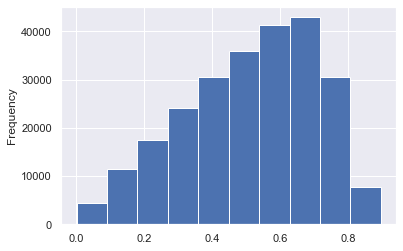

In [34]:
inp1['EXT_SOURCE_3'].plot.hist()
plt.show()

In [35]:
inp1['EXT_SOURCE_3'].mean()

0.5108529061800121

In [36]:
inp1['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

it is a normal distribution column

#### Lets do analysis on AMT_REQ_CREDIT_BUREAU_HOUR 

In [38]:
inp1["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [39]:
inp1["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

<AxesSubplot:ylabel='Frequency'>

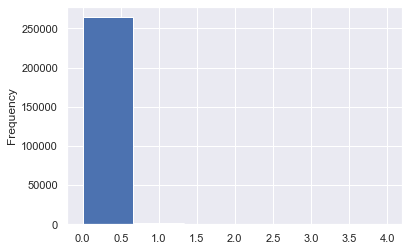

In [41]:
unique_val =  len(inp1.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
inp1['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = unique_val)

lets ignore this column as it does not make any sense 

#### Lets do analysis on AMT_REQ_CREDIT_BUREAU_DAY column

In [44]:
inp1["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [45]:
inp1.AMT_REQ_CREDIT_BUREAU_DAY.unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

<AxesSubplot:ylabel='Frequency'>

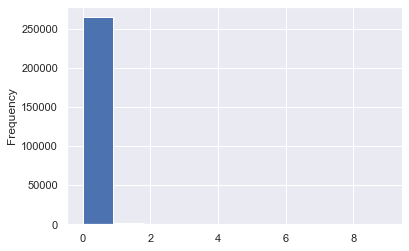

In [47]:
unique_val_Day =  len(inp1.AMT_REQ_CREDIT_BUREAU_DAY.unique())
inp1['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = unique_val_Day)

In [49]:
inp1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

41519

In [50]:
inp1["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

As you can see Major values are 0 soo we can ignore this column  

#### Lets do Analysis on AMT_REQ_CREDIT_BUREAU_WEEK column 

In [51]:
inp1["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

<AxesSubplot:ylabel='Frequency'>

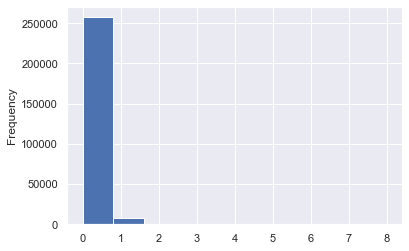

In [52]:
unique_val_week =  len(inp1.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
inp1['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = unique_val_week)

In [53]:
inp1["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

as you can see most values are 0 , soo it is acting as a constant , we can ignore this column

#### lets do analysis on AMT_REQ_CREDIT_BUREAU_MON column

In [54]:
inp1["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

<AxesSubplot:ylabel='Frequency'>

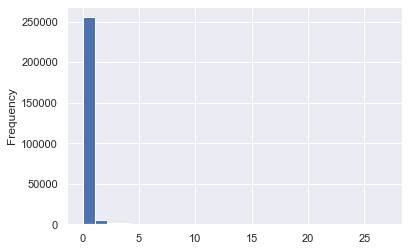

In [55]:
unique_val_mon =  len(inp1.AMT_REQ_CREDIT_BUREAU_MON.unique())
inp1['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = unique_val_mon)

In [56]:
inp1["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

again you can see most values are 0 , soo it is acting as a constant , we can ignore this column

#### Lets do analysis on AMT_REQ_CREDIT_BUREAU_QRT Column

In [59]:
inp1["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

<AxesSubplot:ylabel='Frequency'>

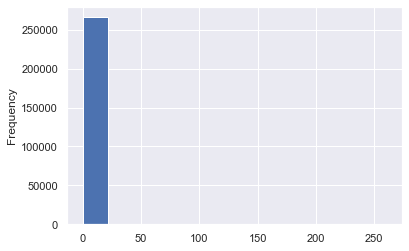

In [62]:
unique_values_qtr =  len(inp1.AMT_REQ_CREDIT_BUREAU_QRT.unique())
inp1['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins =unique_values_qtr)

In [63]:
inp1["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [69]:
inp1["AMT_REQ_CREDIT_BUREAU_QRT"].mode()

0    0.0
dtype: float64

since column has 1 or 0 values, so we will replace null values by mode value

#### Lets do analysis on AMT_REQ_CREDIT_BUREAU_YEAR column

In [66]:
inp1["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

<AxesSubplot:ylabel='Frequency'>

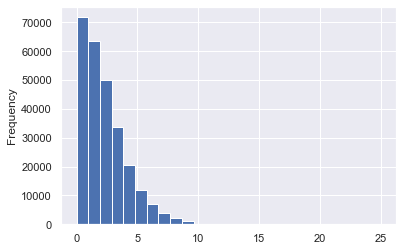

In [67]:
unique_values_year =  len(inp1.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
inp1['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins =unique_values_year)

In [68]:
inp1["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()

0    0.0
dtype: float64

In [70]:
inp1["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()

1.899974435321363

we will replace null values by mode value and not mean value because mean value will give a decimal value.

## Days_Birth 

since this columns have given the data of customer in days format, we will convert it into year form and even these days are negetative so we will convert it into positive by round() function 

In [73]:
inp1["DAYS_BIRTH"].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [74]:
inp1["DAYS_BIRTH"]= -round(inp1["DAYS_BIRTH"]/365,0)
inp1["DAYS_BIRTH"].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [75]:
inp1["DAYS_EMPLOYED"]= -round(inp1["DAYS_EMPLOYED"]/365,0)
inp1["DAYS_EMPLOYED"].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

In [76]:
inp1["DAYS_REGISTRATION"]= -round(inp1["DAYS_REGISTRATION"]/365,0)
inp1["DAYS_REGISTRATION"].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [77]:
inp1["DAYS_ID_PUBLISH"]= -round(inp1["DAYS_ID_PUBLISH"]/365,0)
inp1["DAYS_ID_PUBLISH"].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

## Lets Work on target Column 

#### Total entries in target column

In [79]:
inp1["TARGET"].count()

307511

#### Customer with payment difficulties 

In [88]:
(inp1["TARGET"]==1).sum()

24825

#### other customer 

In [89]:
(inp1["TARGET"]==0).sum()

282686

#### Check the Ratio 

In [90]:
(inp1["TARGET"]==0).sum()/(inp1["TARGET"]==1).sum()

11.387150050352467

Very High Ratio 

## Now Lets  analyse numerical and categorical data. Let's start with categorical data.

### Analysing categorical data
Since due to data imbalance, we will separate out the tree with a target equal to 0 and tree with a target equal to 1. And we will analyse them individually to find relation

In [92]:
tree_0 = tree.loc[tree['TARGET'] == 0]
tree_1 = tree.loc[tree['TARGET'] == 1]

Here, we have used 3 different plots for analysis
- Pie plot: For plotting the all the values present in a column in terms of percentage. So, the sum of those data types will be 100. 
- Countplot 1: Here, plotted the count of the different categories. So, Target=0 will have higher count than Target=1. 
- Countplot 2: To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for Target=0 and Target=1 are mostly equal

In [95]:
def plotting(tree, tree0, tree1, column):
    
    tree = tree
    tree_0 = tree0
    tree_1 = tree1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    tree[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = tree, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((tree_0[col].value_counts())/len(tree_0))
    df['1']= ((tree_1[col].value_counts())/len(tree_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [96]:
tree_categorical = tree.select_dtypes(include=['object']).columns

### Univariate Analysis of the Categorical data

#### Plotting the data.

Plotting  NAME_CONTRACT_TYPE


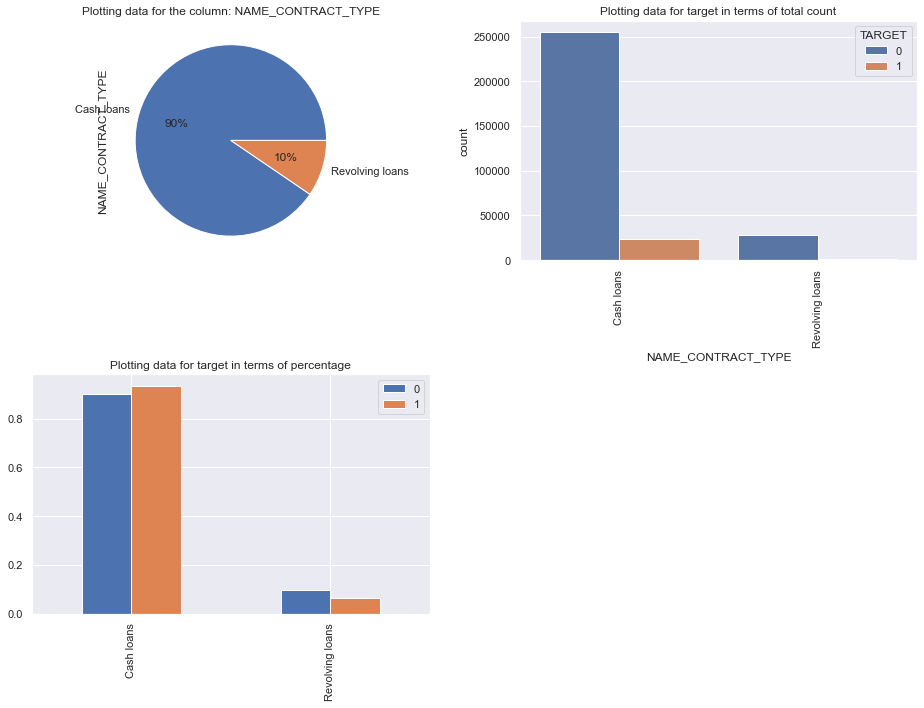

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


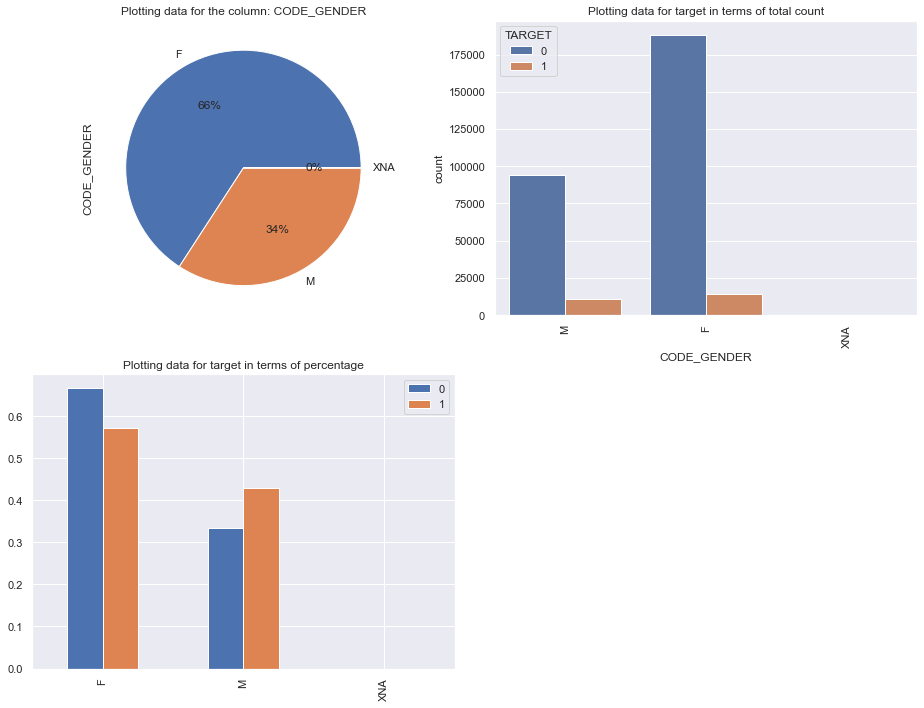

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


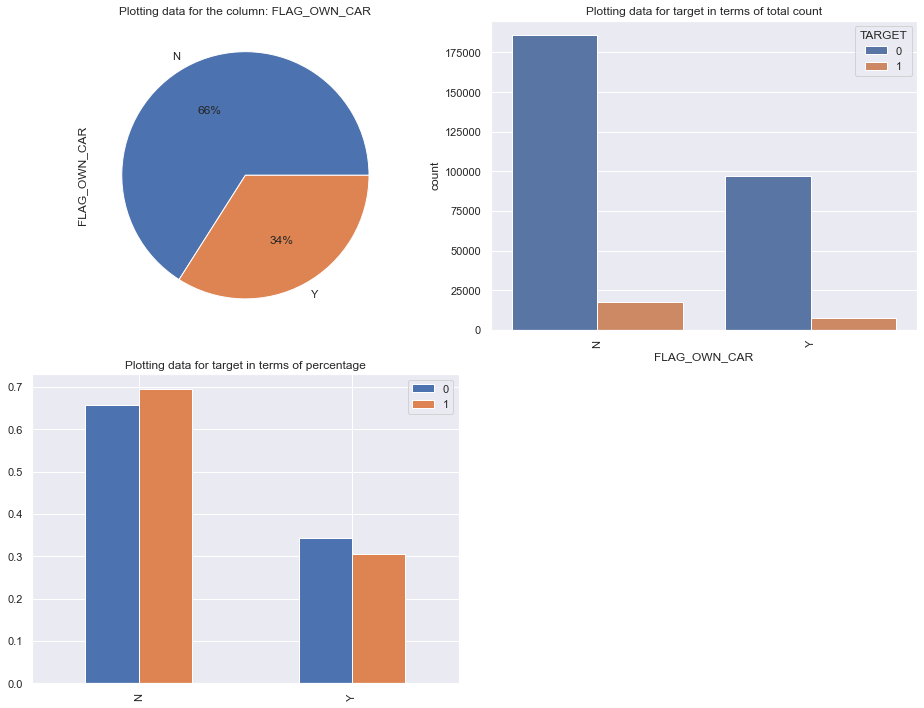

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


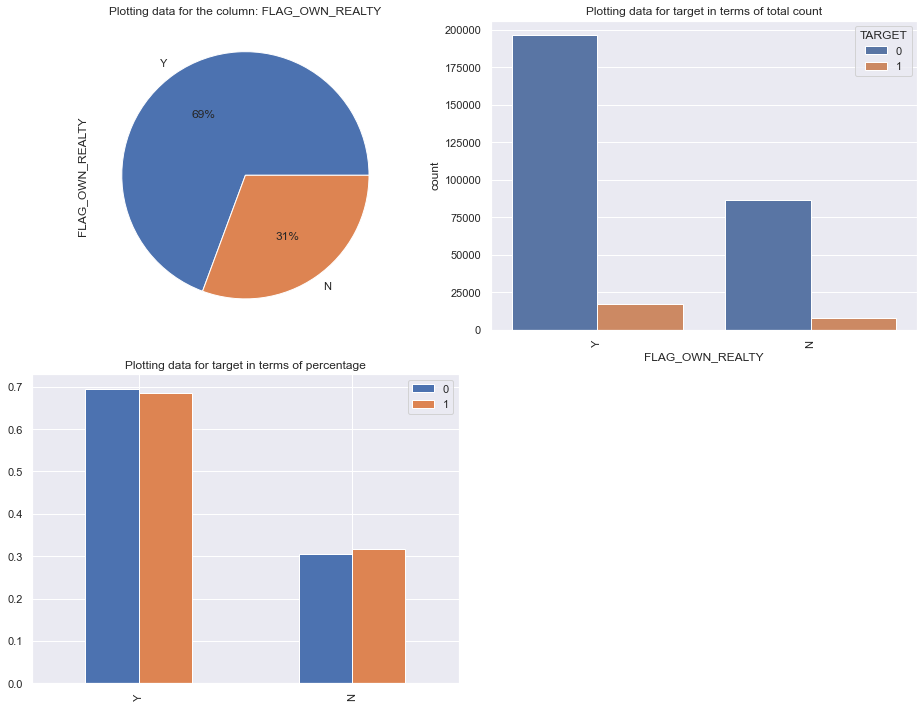

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


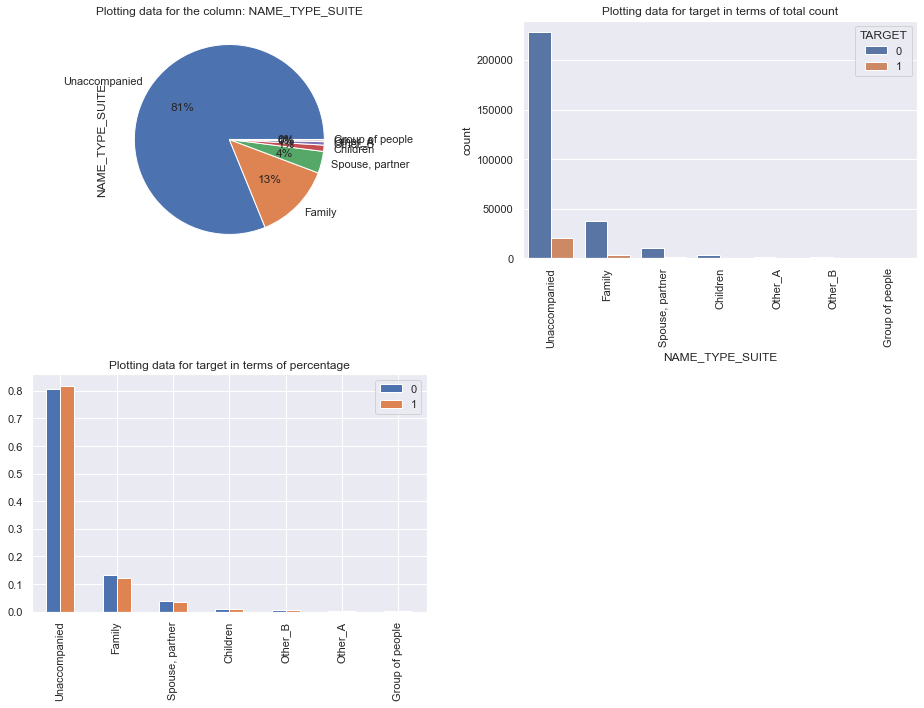

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


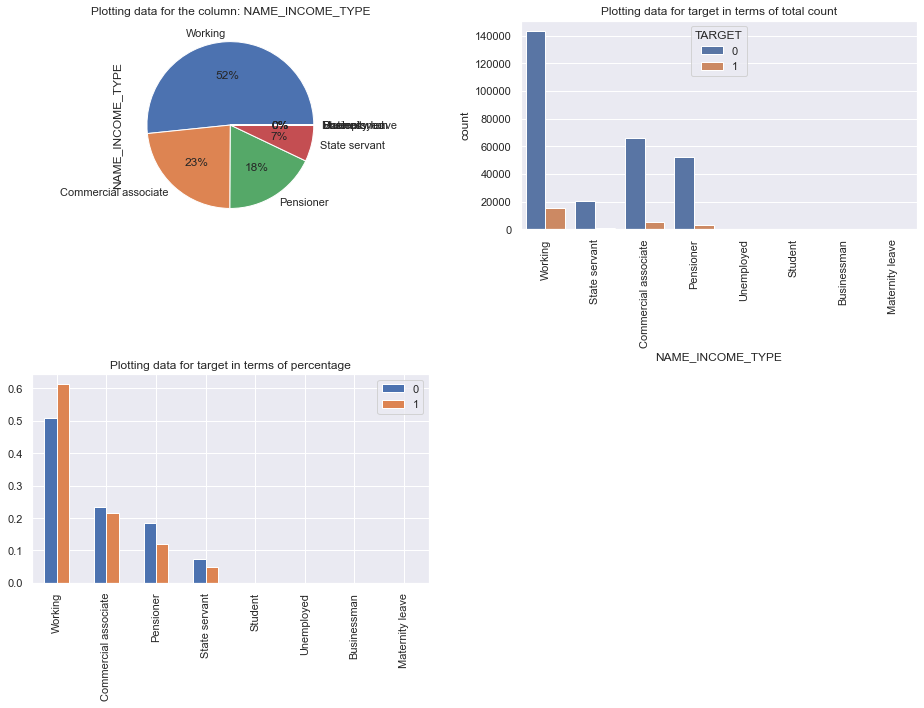

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


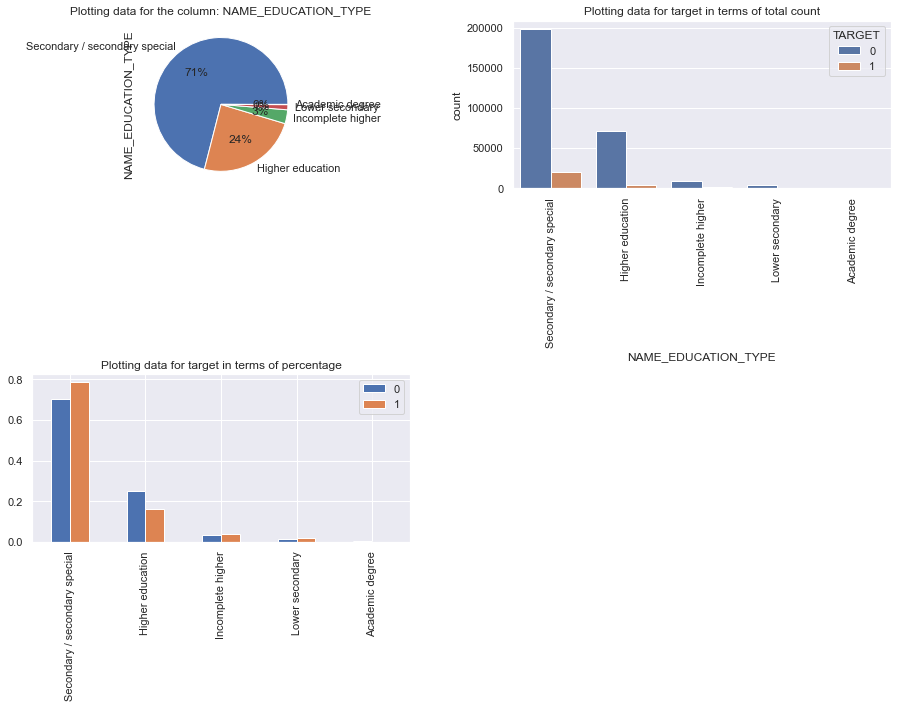

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


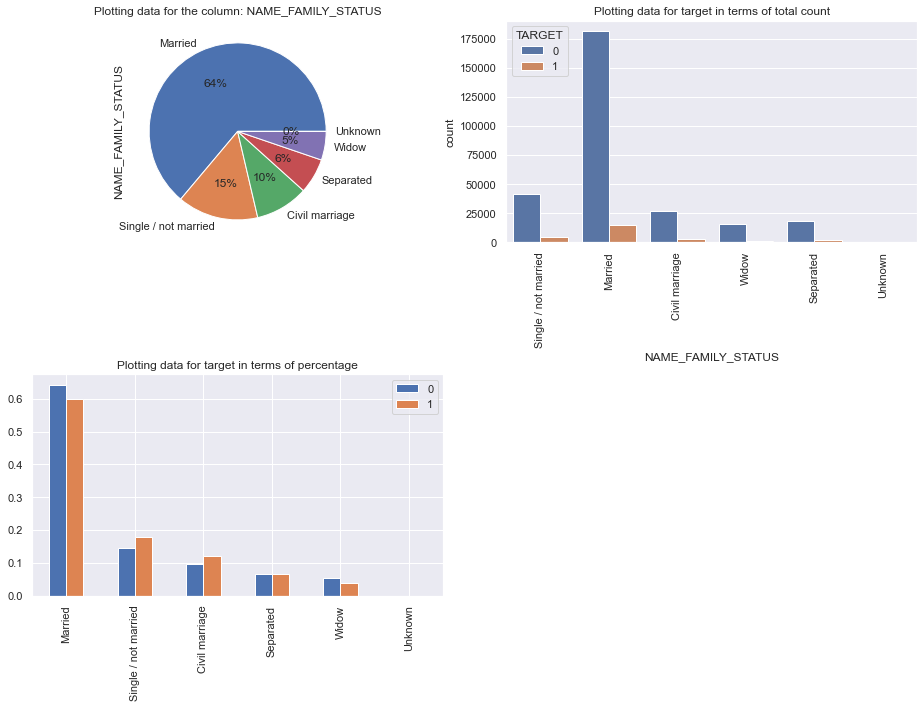

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


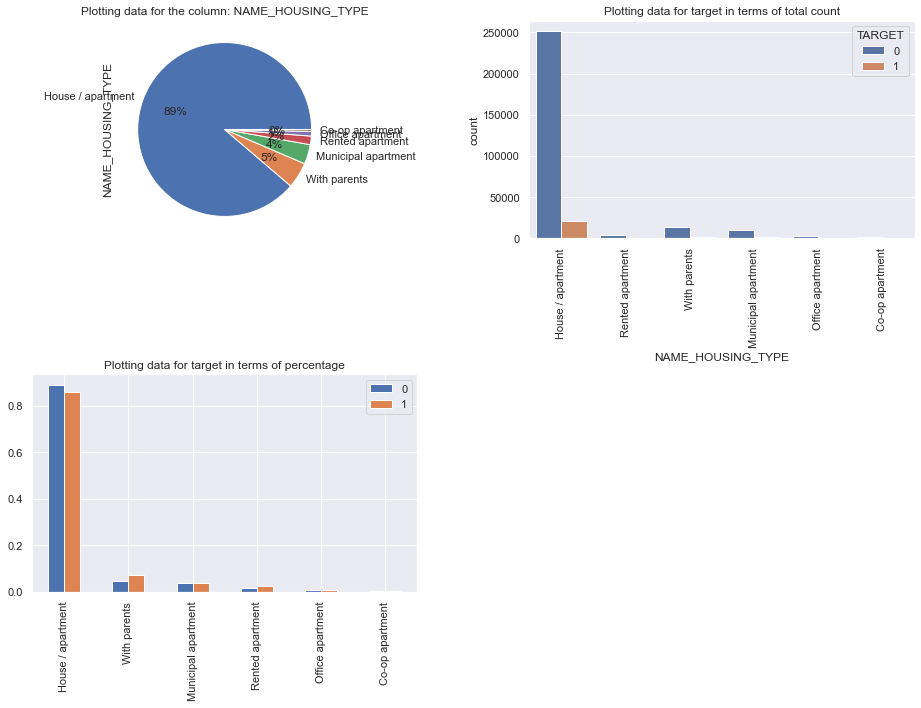

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


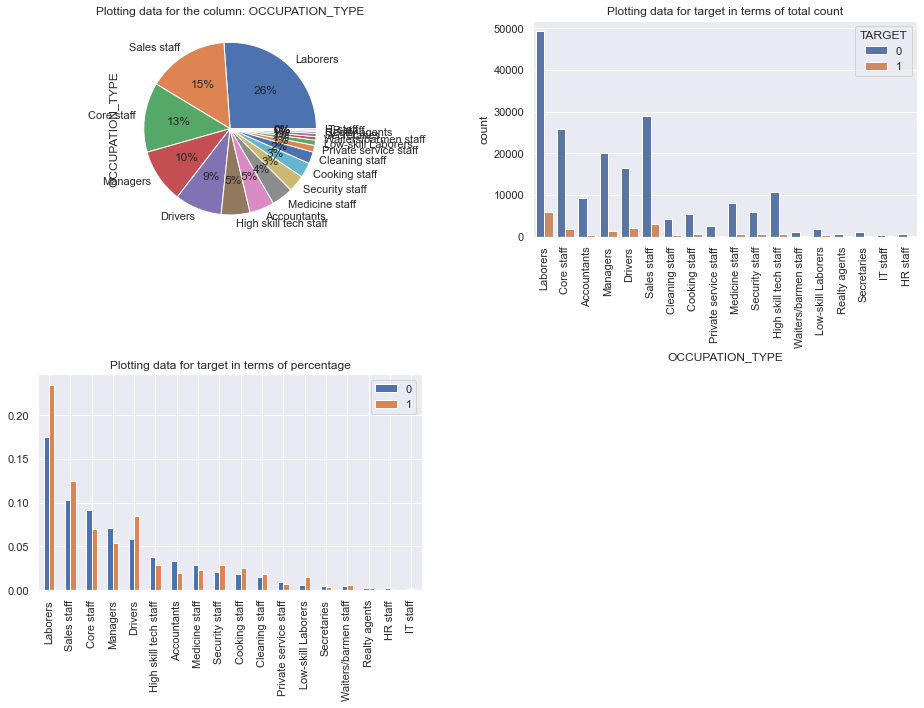

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


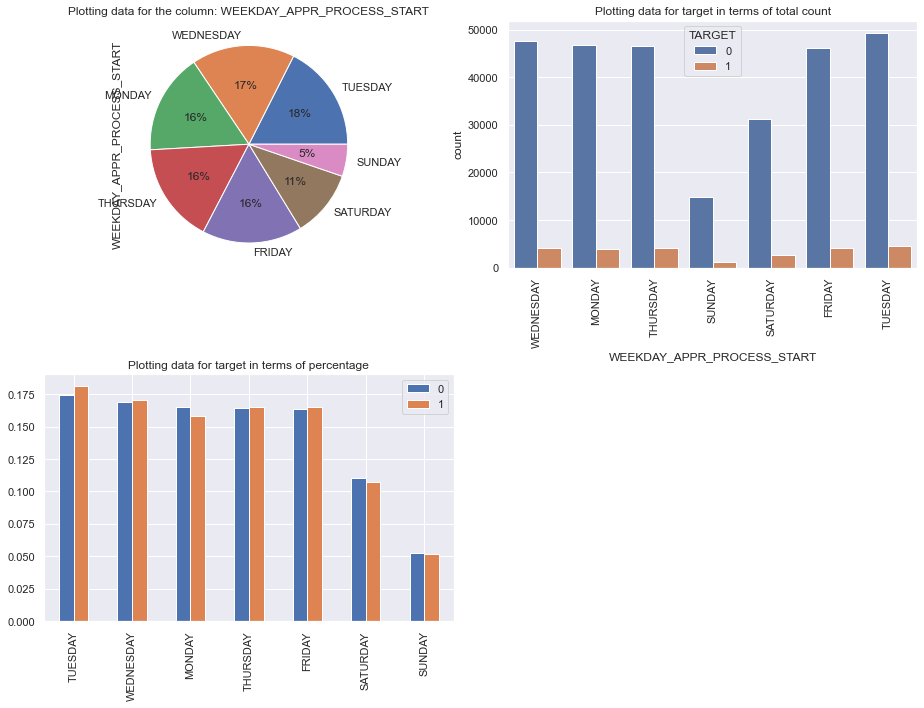

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


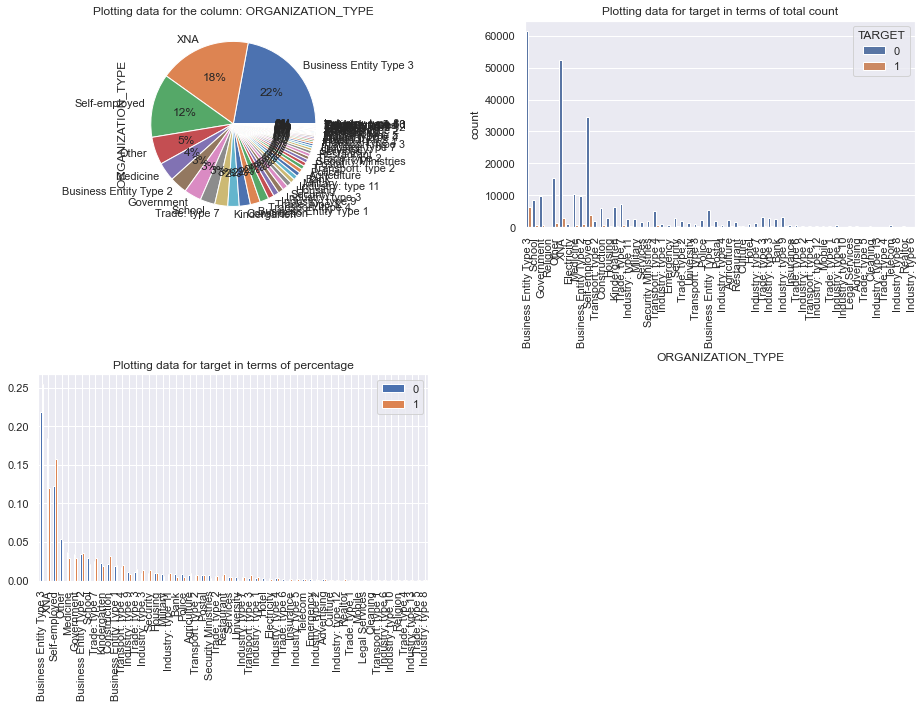

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


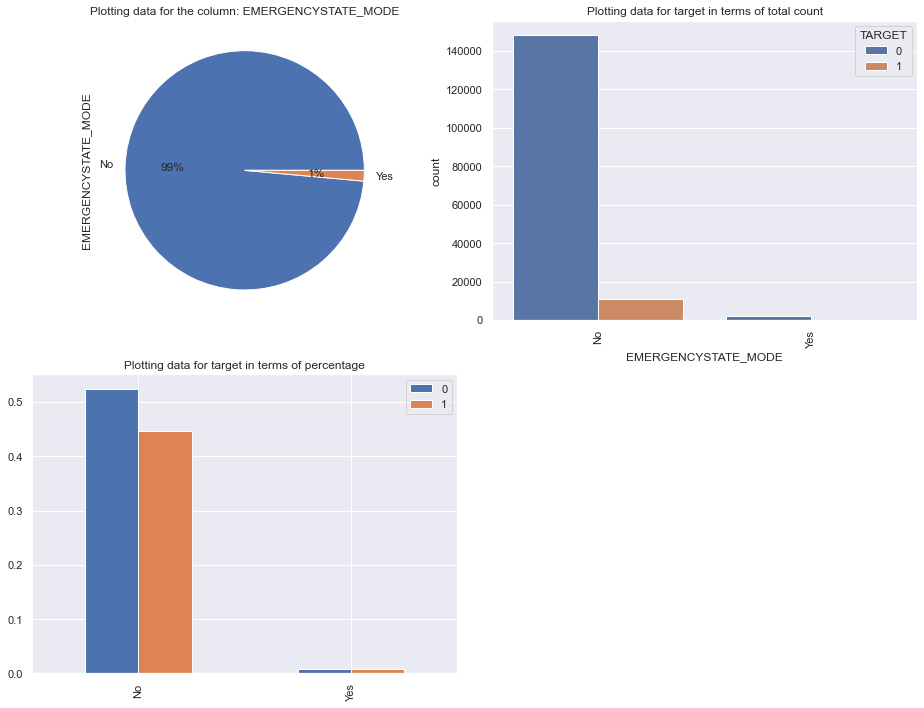

----------------------------------------------------------------------------------------------


In [98]:
for column in tree_categorical:
    print("Plotting ", column)
    plotting(tree, tree_0, tree_1, column)
    print('----------------------------------------------------------------------------------------------')

### Conclusion we can get from above charts are 
- CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
- NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.
- NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low. 
- NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.
- OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible.  

### Lets study Numerical Columns 

#### Non Defaulter Correction 

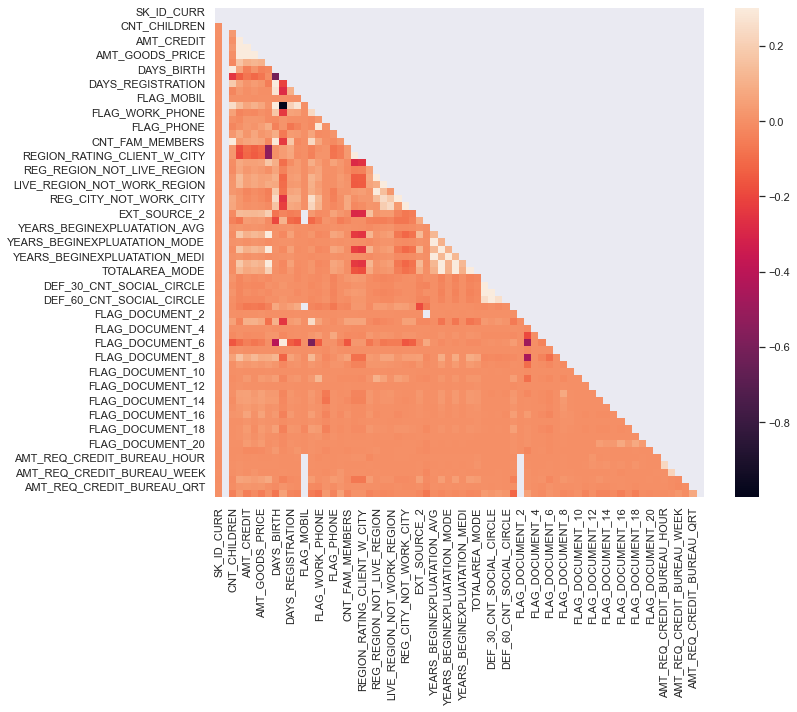

In [99]:
corr = tree_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

#### Now lets Find the top 10 Correlation  

In [100]:
correlation_0 = tree_0.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

print(correlation_0)

EXT_SOURCE_2              FLAG_DOCUMENT_2                 0.000004
FLAG_DOCUMENT_2           EXT_SOURCE_2                    0.000004
FLAG_MOBIL                FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12          FLAG_MOBIL                      0.000005
FLAG_DOCUMENT_4           YEARS_BEGINEXPLUATATION_MEDI    0.000008
                                                            ...   
FLOORSMAX_MEDI            FLOORSMAX_AVG                   0.997018
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE        0.998508
DAYS_EMPLOYED             FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE            DAYS_EMPLOYED                   0.999758
Length: 4390, dtype: float64


#### Top Correlation are 
EXT_SOURCE_1                 DAYS_BIRTH                     =0.601210

DAYS_EMPLOYED                DAYS_BIRTH                     =0.618048

AMT_CREDIT                   AMT_ANNUITY                    =0.771309

AMT_GOODS_PRICE              AMT_ANNUITY                    =0.776686

LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         =0.830381

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     =0.861861

CNT_FAM_MEMBERS              CNT_CHILDREN                   =0.878571

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           =0.950149

AMT_CREDIT                   AMT_GOODS_PRICE                =0.987250

DAYS_EMPLOYED                FLAG_EMP_PHONE                 =0.999758

#### Top Correlation for defaulter are 
EXT_SOURCE_1                 DAYS_BIRTH                     =0.570054

DAYS_EMPLOYED                DAYS_BIRTH                     =0.575097

FLAG_EMP_PHONE               DAYS_BIRTH                     =0.578519

AMT_CREDIT                   AMT_ANNUITY                    =0.752195

AMT_GOODS_PRICE              AMT_ANNUITY                    =0.752699

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        =0.778540

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    =0.847885

CNT_CHILDREN                 CNT_FAM_MEMBERS                =0.885484

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           =0.956637

AMT_CREDIT                   AMT_GOODS_PRICE                =0.983103

DAYS_EMPLOYED                FLAG_EMP_PHONE                 =0.999702

#### Lets find and plot Defaulter correlation 

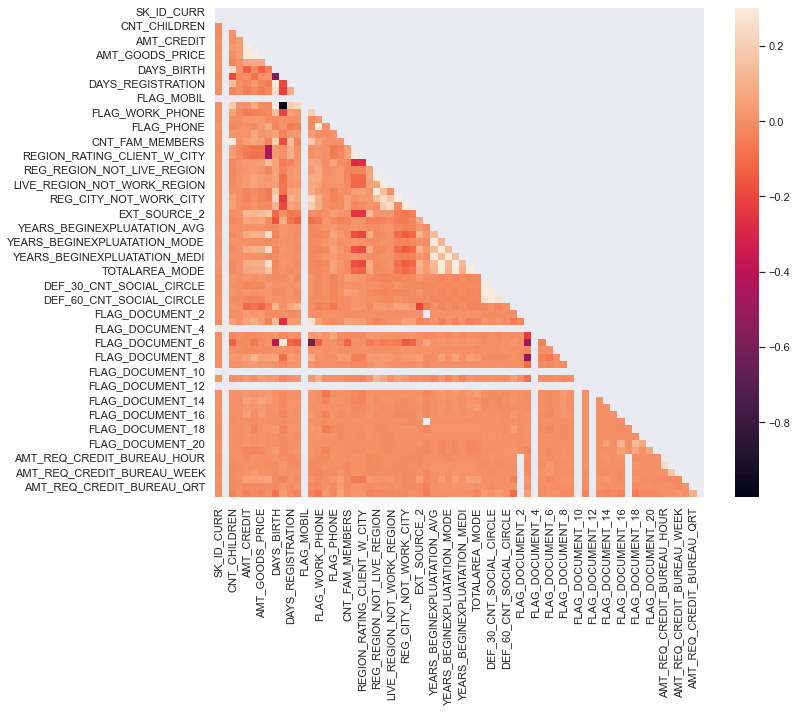

In [102]:
corr = tree_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [103]:
correlation_1 = tree_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind="quicksort")
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)

FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
                                                              ...   
FLOORSMAX_AVG                FLOORSMAX_MEDI                 0.997187
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999702
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
Length: 3878, dtype: float64


#### Analysis through Box plot 

Potting the numerial data based on the index and analysing if there are outliers in any of the column. 

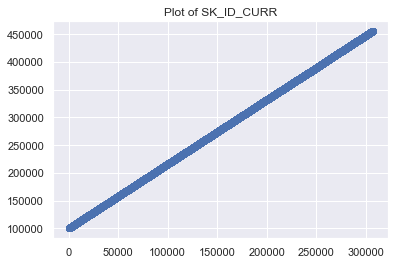

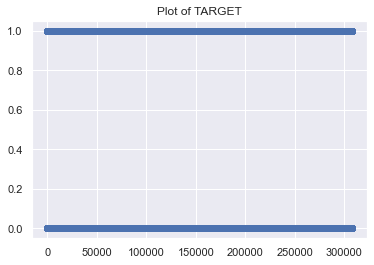

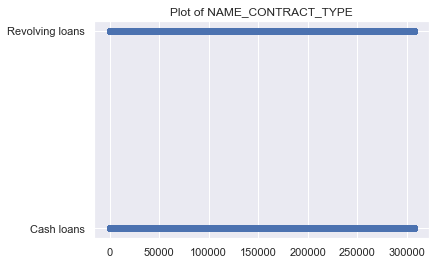

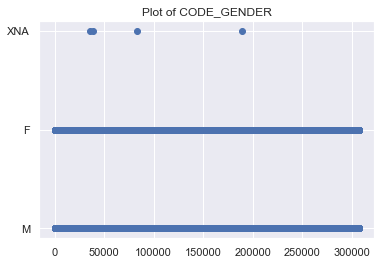

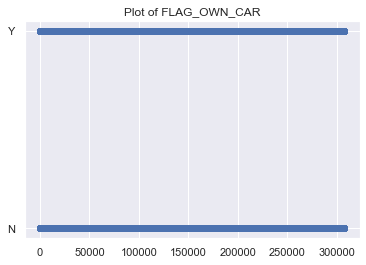

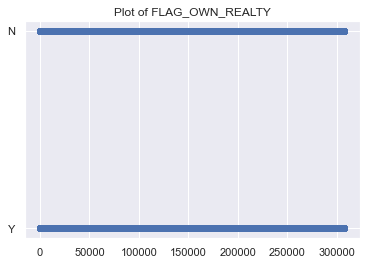

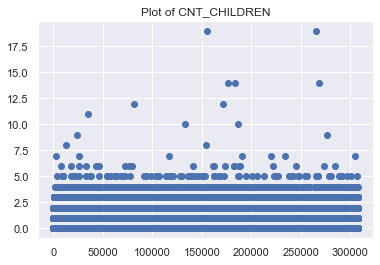

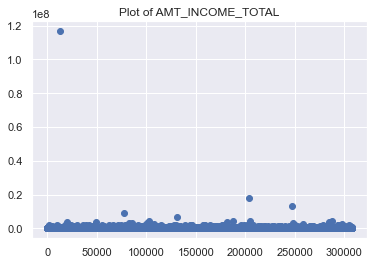

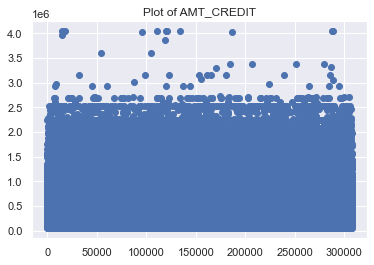

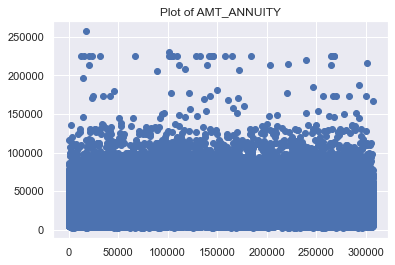

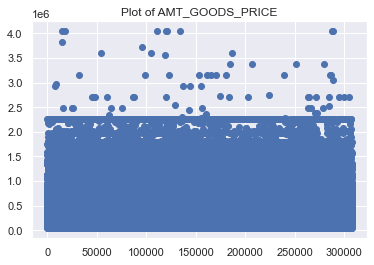

TypeError: 'value' must be an instance of str or bytes, not a float

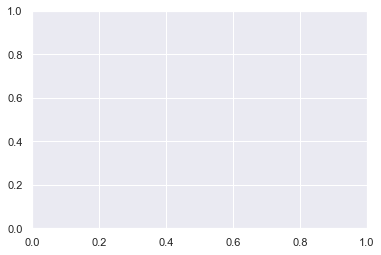

In [128]:
for column in tree:
    title = "Plot of "+column
    plt.scatter(tree.index, tree[column])
    plt.title(title)
    plt.show()

#### Some Columns we need to focuse on are
- CNT_CHILDREN - Count of children - Some client have >10 childen, which looks like an extreme value.
- AMT_INCOME_TOTAL - Income of the client - One value with value ~1.2 1e8 seems to be outlier as the value is significantly far away form others and can be removed.


as you can see some of columns are having float value 

### Converting a numerial data to categorical for analysis

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


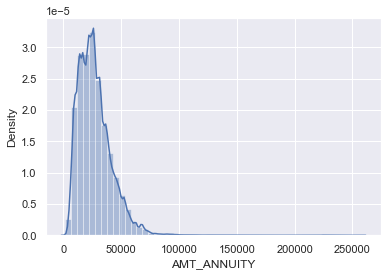

In [114]:
sns.distplot(tree['AMT_ANNUITY'].dropna())
plt.show()

Lets create a categorical column for amount ammunity 

In [116]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

tree['amt_annuity_categorical'] = tree['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_28020/918611320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['amt_annuity_categorical'] = tree['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))


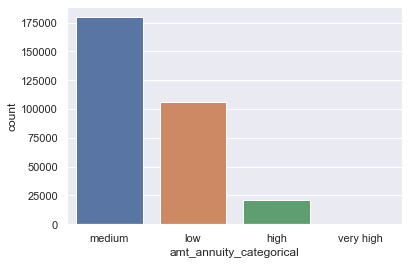

In [117]:
sns.countplot(x= 'amt_annuity_categorical', data = tree)
plt.show()

###  Univariate Analysis for numerical data

Plot of SK_ID_CURR


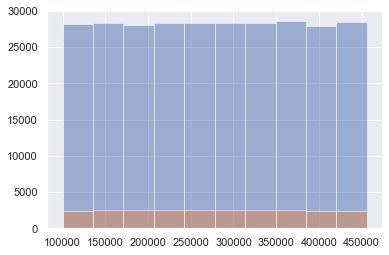

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


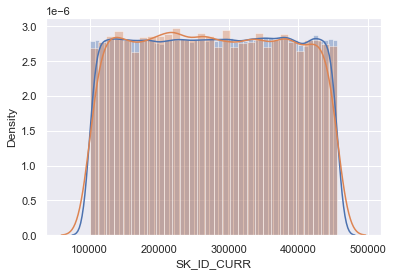

------------------------------------------------------------------------
Plot of TARGET


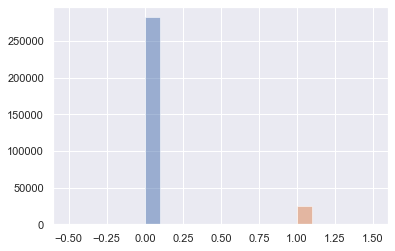

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\

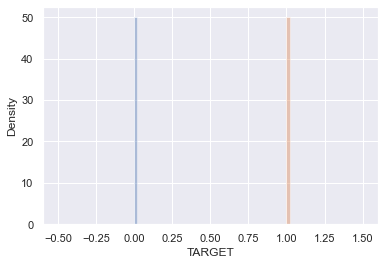

------------------------------------------------------------------------
Plot of NAME_CONTRACT_TYPE


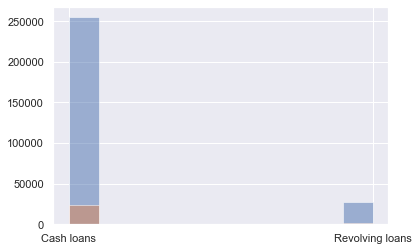

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Cash loans'

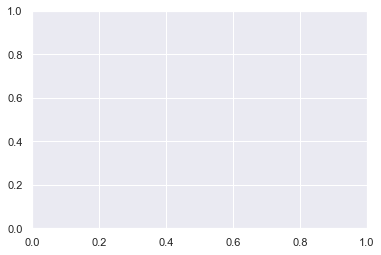

In [123]:
for column in tree:
    title = "Plot of "+column
    print(title)
    plt.hist(tree_0[column], alpha=0.5, label='0')
    plt.hist(tree_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(tree_0[column].dropna(), label='0')
    sns.distplot(tree_1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

## Reading previous application

In [129]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
previous_application.shape

(1670214, 37)

### Lets check if there are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [132]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [131]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

#### As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

### Let's merge dataframe: train and previous application based on SK_ID_PREV

In [133]:
previous_tree = tree.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [134]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### The merged dataframe also has multiple values for SK_ID_CURR

In [136]:
previous_application["SK_ID_CURR"].value_counts().head(10)

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
Name: SK_ID_CURR, dtype: int64

### Segregating the dataset on Target=0 and Target=1

In [137]:
ptree_0 = previous_tree.loc[previous_tree['TARGET'] == 0]
ptree_1 = previous_tree.loc[previous_tree['TARGET'] == 1]

## Plotting data

In [140]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    tree[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((tree_0[col].value_counts())/len(tree_0))
    df['1']= ((tree_1[col].value_counts())/len(tree_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptree_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptree_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

## Bivariate Analysis 

### Lets plot- NAME_EDUCATION_TYPE

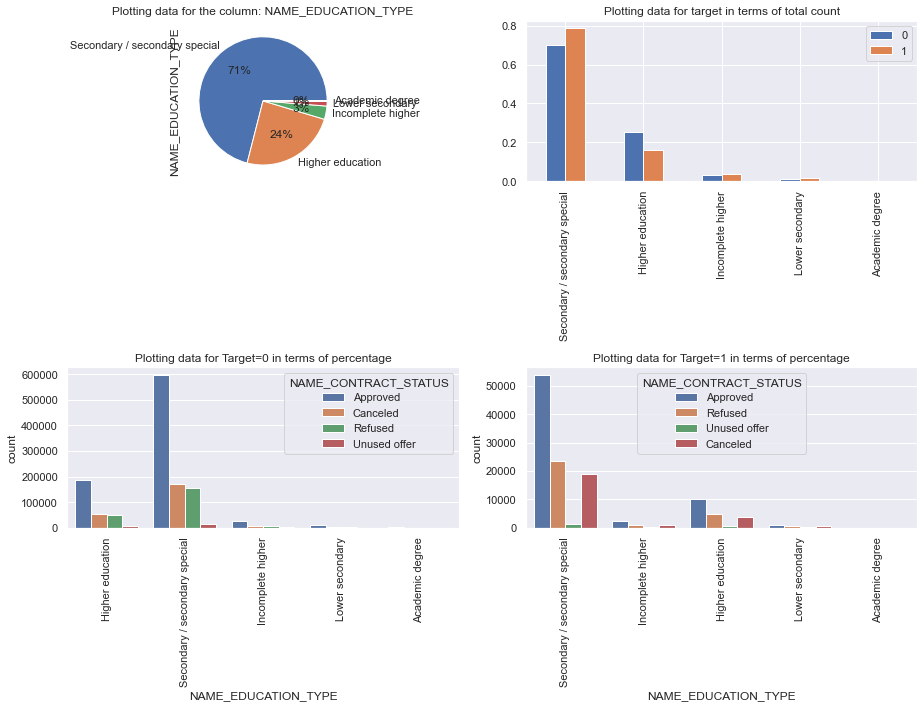

In [141]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

 People tend to make more loan for 'Secondary special' and their loan is also approved. 

### Lets plot- NAME_FAMILY_STATUS

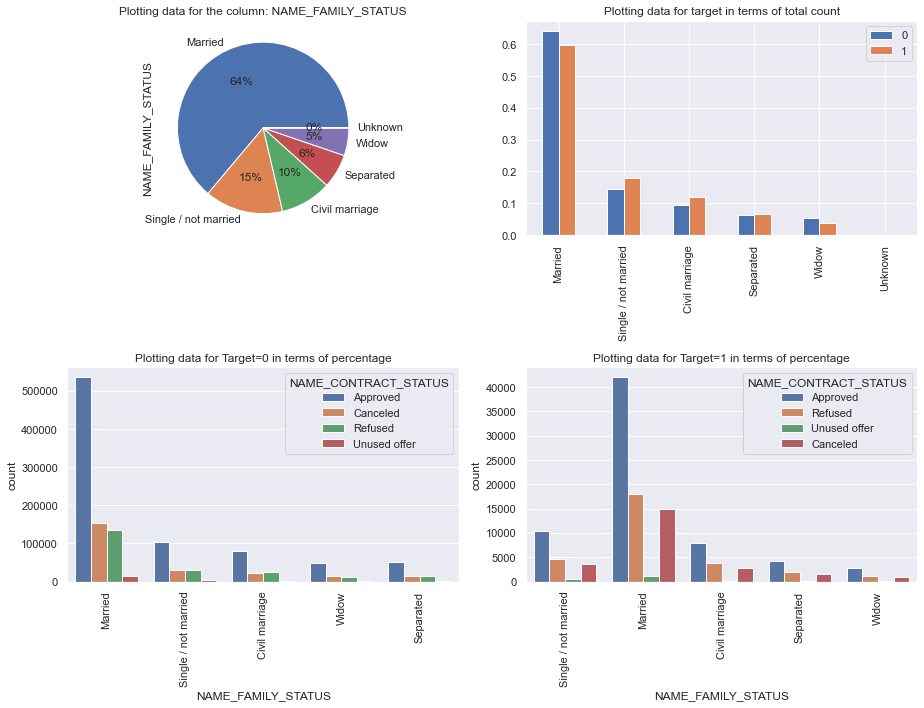

In [142]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

 You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles.

### Lets plot- NAME_HOUSING_TYPE

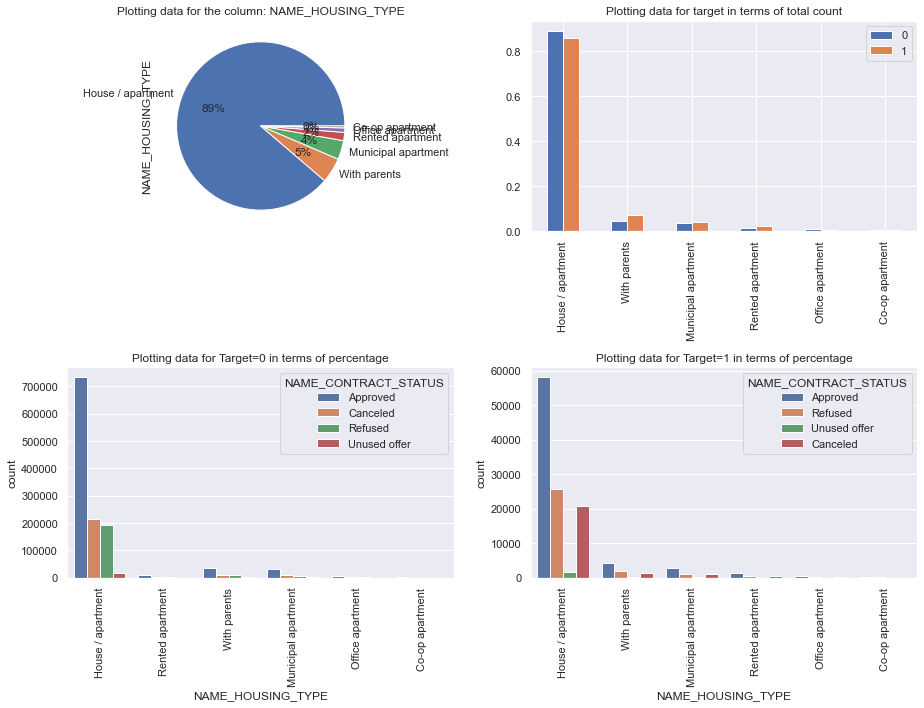

In [143]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')  

You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment.

### Lets plot- ORGANIZATION_TYPE 

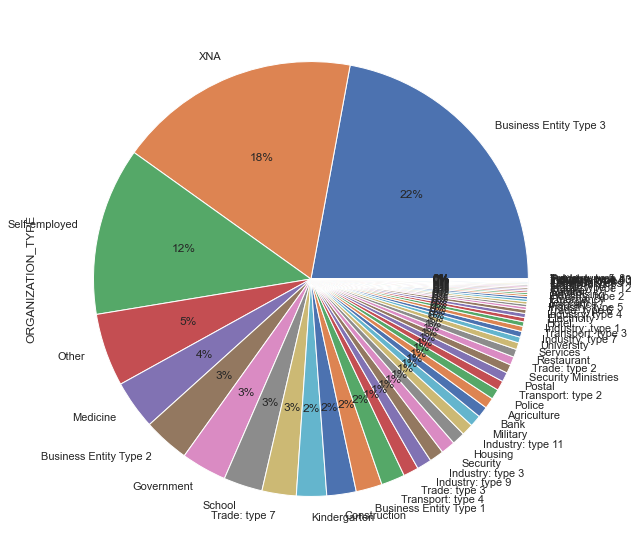

In [145]:
col = 'ORGANIZATION_TYPE'
tree[col].value_counts().plot.pie(autopct = "%1.0f%%",figsize=(10,10))
plt.show()

<AxesSubplot:>

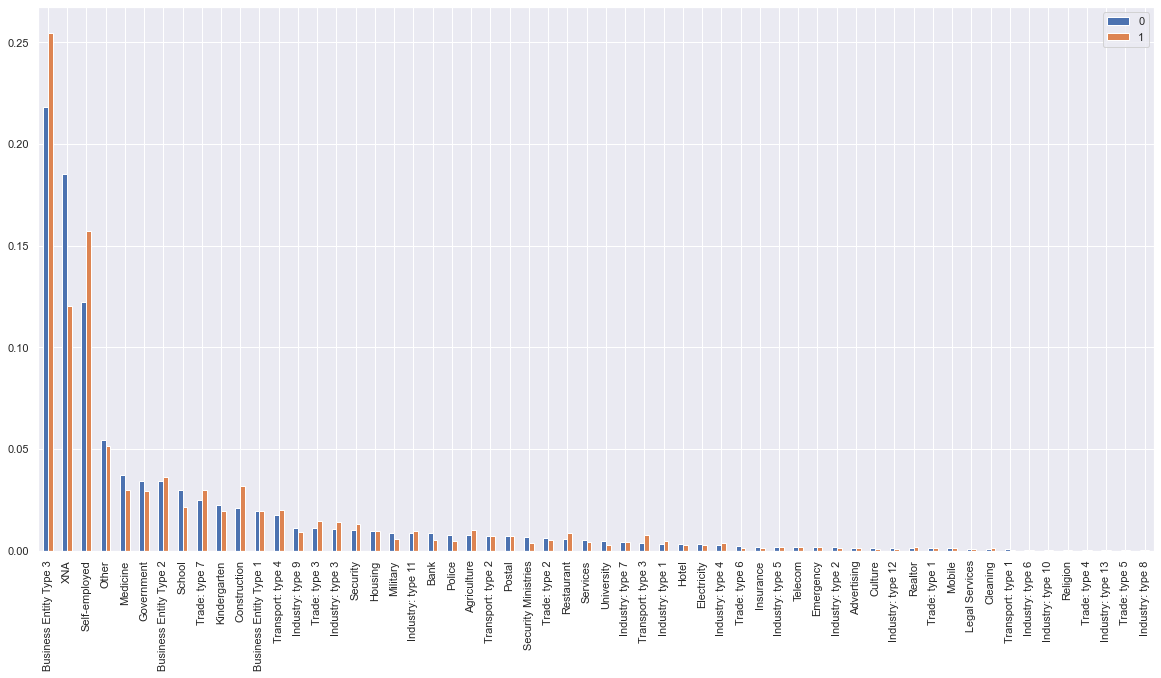

In [147]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((tree_0[col].value_counts())/len(tree_0))
df['1']= ((tree_1[col].value_counts())/len(tree_1))
sns.set(rc={'figure.figsize':(20,10)})
df.plot.bar()

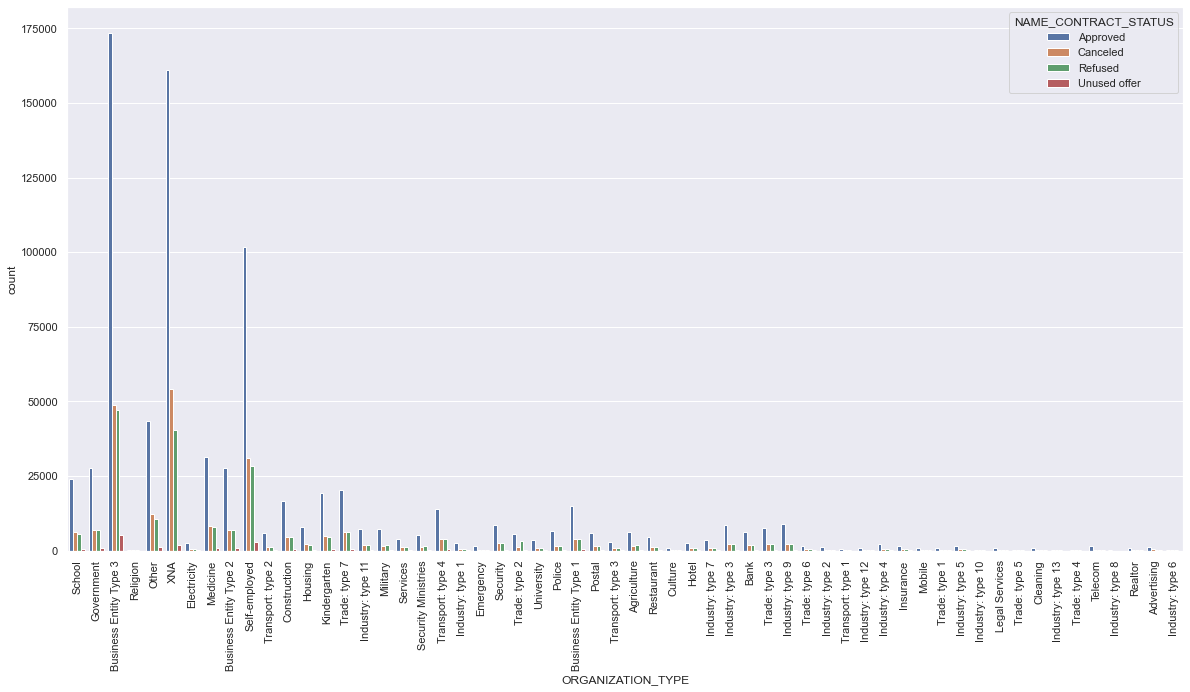

In [149]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptree_0)
plt.xticks(rotation=90)
plt.show()

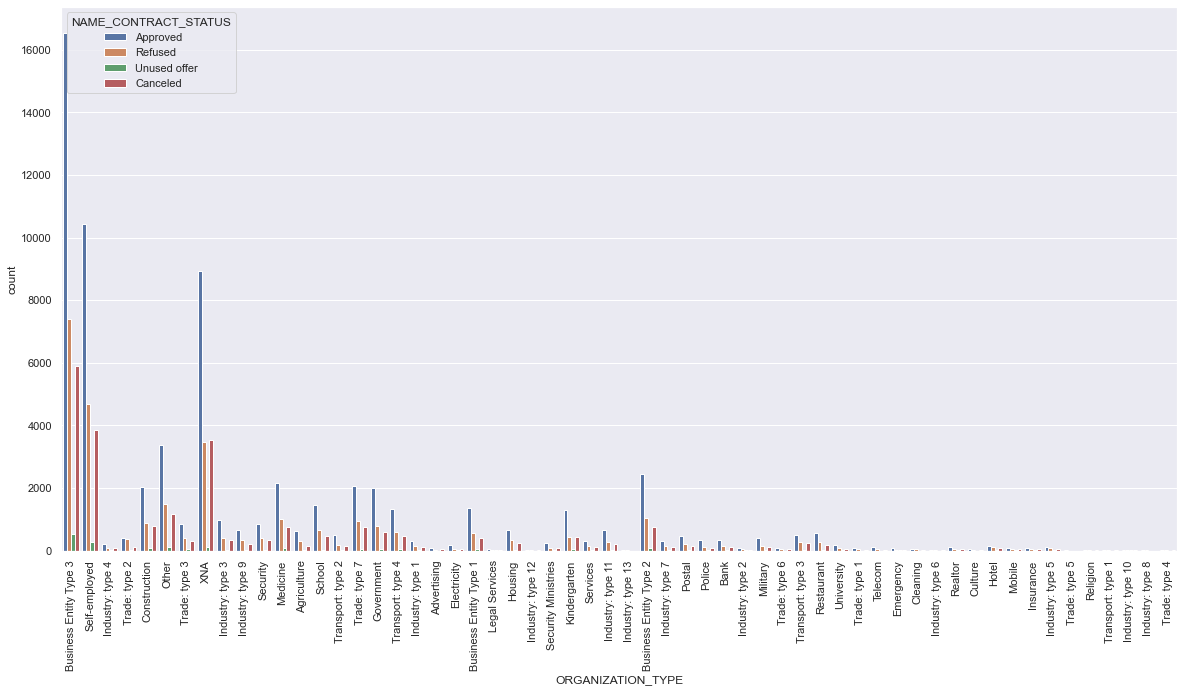

In [150]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptree_1)
plt.xticks(rotation=90)
plt.show()

- The univariate analysis of this dataset was more fruitful than bivariate analysis.
-  Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter

##### Thank You  